## Importing libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

## Import dataset and cheak the dataset

In [25]:
df = pd.read_csv("Telecom_Customer_Churn_Dataset.csv")

## Cheak the shape of the datasets

In [26]:
df.shape

(2500, 8)

## Cheak the datatypes

In [27]:
df.dtypes

CustomerID              str
Tenure_Months         int64
Monthly_Charges     float64
Total_Charges       float64
Contract_Type           str
Internet_Service        str
Payment_Method          str
Churn                   str
dtype: object

## Cheak the informations about the datasets

In [28]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        2500 non-null   str    
 1   Tenure_Months     2500 non-null   int64  
 2   Monthly_Charges   2500 non-null   float64
 3   Total_Charges     2500 non-null   float64
 4   Contract_Type     2500 non-null   str    
 5   Internet_Service  2500 non-null   str    
 6   Payment_Method    2500 non-null   str    
 7   Churn             2500 non-null   str    
dtypes: float64(2), int64(1), str(5)
memory usage: 244.4 KB


## Show the 1st 5 rows from the datasets

In [29]:
df.head()

,CustomerID,Tenure_Months,Monthly_Charges,Total_Charges,Contract_Type,Internet_Service,Payment_Method,Churn
0,CUST00001,52,1541.42,75408.44,Two Year,No,UPI,No
1,CUST00002,15,1317.97,73419.49,Month-to-Month,DSL,Bank Transfer,No
2,CUST00003,61,409.64,87681.15,Month-to-Month,No,Credit Card,No
3,CUST00004,21,1791.31,72417.07,Two Year,DSL,Bank Transfer,No
4,CUST00005,24,1791.34,23568.21,One Year,Fiber Optic,Debit Card,No


## Show the last 5 rows from the datasets

In [30]:
df.tail()

,CustomerID,Tenure_Months,Monthly_Charges,Total_Charges,Contract_Type,Internet_Service,Payment_Method,Churn
2495,CUST02496,33,479.19,25890.63,Month-to-Month,No,Debit Card,No
2496,CUST02497,52,1241.50,85917.79,Two Year,No,Credit Card,No
2497,CUST02498,14,1172.06,54865.85,Month-to-Month,No,Credit Card,Yes
2498,CUST02499,53,778.37,57162.91,One Year,Fiber Optic,UPI,No
2499,CUST02500,59,1697.79,34645.80,Month-to-Month,Fiber Optic,UPI,No


## Get the statistical functions of the datasets

In [31]:
df.describe()

,Tenure_Months,Monthly_Charges,Total_Charges
count,2500.000000,2500.000000,2500.000000
mean,35.110800,1151.734676,49905.849216
std,20.479509,490.233166,28609.479902
min,1.000000,300.320000,562.440000
25%,17.000000,731.127500,25845.335000
50%,35.000000,1167.605000,50212.670000
75%,53.000000,1581.170000,74179.852500
max,71.000000,1999.510000,99985.000000


## Get the total null values according to the rows

In [32]:
df.isnull().sum()

CustomerID          0
Tenure_Months       0
Monthly_Charges     0
Total_Charges       0
Contract_Type       0
Internet_Service    0
Payment_Method      0
Churn               0
dtype: int64

## Get the total null values according to the rows


In [33]:
df.isnull().sum()

CustomerID          0
Tenure_Months       0
Monthly_Charges     0
Total_Charges       0
Contract_Type       0
Internet_Service    0
Payment_Method      0
Churn               0
dtype: int64

## Get the total duplicate values 

In [34]:
df.duplicated().sum()

np.int64(0)

#  select all numeric vale columns 

In [35]:
df1 = df.select_dtypes(include=np.number)
df1

,Tenure_Months,Monthly_Charges,Total_Charges
0,52,1541.42,75408.44
1,15,1317.97,73419.49
2,61,409.64,87681.15
3,21,1791.31,72417.07
4,24,1791.34,23568.21
...,...,...,...
2495,33,479.19,25890.63
2496,52,1241.50,85917.79
2497,14,1172.06,54865.85
2498,53,778.37,57162.91


 # Feature scaling

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = (scaler.fit_transform(df1))
df1
df2 = pd.DataFrame(df1,columns=["Tenure_Months","Monthly_Charges","Total_Charges"])
df2

,Tenure_Months,Monthly_Charges,Total_Charges
0,0.824853,0.795057,0.891582
1,-0.982193,0.339162,0.822047
2,1.264404,-1.514061,1.320641
3,-0.689158,1.304896,0.787002
4,-0.542641,1.304957,-0.920776
...,...,...,...
2495,-0.103089,-1.372162,-0.839583
2496,0.824853,0.183144,1.258993
2497,-1.031032,0.041469,0.173404
2498,0.873692,-0.761759,0.253710


#  select all cetogerial vale columns 

In [37]:
df4 = df.select_dtypes(include=['object'])
df4

,CustomerID,Contract_Type,Internet_Service,Payment_Method,Churn
0,CUST00001,Two Year,No,UPI,No
1,CUST00002,Month-to-Month,DSL,Bank Transfer,No
2,CUST00003,Month-to-Month,No,Credit Card,No
3,CUST00004,Two Year,DSL,Bank Transfer,No
4,CUST00005,One Year,Fiber Optic,Debit Card,No
...,...,...,...,...,...
2495,CUST02496,Month-to-Month,No,Debit Card,No
2496,CUST02497,Two Year,No,Credit Card,No
2497,CUST02498,Month-to-Month,No,Credit Card,Yes
2498,CUST02499,One Year,Fiber Optic,UPI,No


In [38]:
df4 = df4.drop('CustomerID',axis=1)
df4

,Contract_Type,Internet_Service,Payment_Method,Churn
0,Two Year,No,UPI,No
1,Month-to-Month,DSL,Bank Transfer,No
2,Month-to-Month,No,Credit Card,No
3,Two Year,DSL,Bank Transfer,No
4,One Year,Fiber Optic,Debit Card,No
...,...,...,...,...
2495,Month-to-Month,No,Debit Card,No
2496,Two Year,No,Credit Card,No
2497,Month-to-Month,No,Credit Card,Yes
2498,One Year,Fiber Optic,UPI,No


# Encoding 

In [39]:
from sklearn.preprocessing import LabelEncoder
for i in df4:
    df4[i] = LabelEncoder().fit_transform(df4[i])

df4

,Contract_Type,Internet_Service,Payment_Method,Churn
0,2,2,3,0
1,0,0,0,0
2,0,2,1,0
3,2,0,0,0
4,1,1,2,0
...,...,...,...,...
2495,0,2,2,0
2496,2,2,1,0
2497,0,2,1,1
2498,1,1,3,0


# Combining The Numerical & cetogerial columns

In [40]:
df5 = pd.concat([df2,df4,],axis=1)
df5

,Tenure_Months,Monthly_Charges,Total_Charges,Contract_Type,Internet_Service,Payment_Method,Churn
0,0.824853,0.795057,0.891582,2,2,3,0
1,-0.982193,0.339162,0.822047,0,0,0,0
2,1.264404,-1.514061,1.320641,0,2,1,0
3,-0.689158,1.304896,0.787002,2,0,0,0
4,-0.542641,1.304957,-0.920776,1,1,2,0
...,...,...,...,...,...,...,...
2495,-0.103089,-1.372162,-0.839583,0,2,2,0
2496,0.824853,0.183144,1.258993,2,2,1,0
2497,-1.031032,0.041469,0.173404,0,2,1,1
2498,0.873692,-0.761759,0.253710,1,1,3,0


# Defining features and targets

In [41]:
y=df5["Churn"]
X=df5.drop("Churn",axis=1)

X.head()

,Tenure_Months,Monthly_Charges,Total_Charges,Contract_Type,Internet_Service,Payment_Method
0,0.824853,0.795057,0.891582,2,2,3
1,-0.982193,0.339162,0.822047,0,0,0
2,1.264404,-1.514061,1.320641,0,2,1
3,-0.689158,1.304896,0.787002,2,0,0
4,-0.542641,1.304957,-0.920776,1,1,2


# Train test split

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

# Model selection

In [43]:
model = LogisticRegression()

# Train the model

In [44]:
model.fit(X_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

# Making predictions

In [47]:
y_pred = model.predict(X_test)

# Evaluate the model

In [55]:
acc = accuracy_score(y_test,y_pred)
acc,

(0.726,)

In [56]:
cr = classification_report(y_test,y_pred)
cr

'              precision    recall  f1-score   support\n\n           0       0.73      1.00      0.84       363\n           1       0.00      0.00      0.00       137\n\n    accuracy                           0.73       500\n   macro avg       0.36      0.50      0.42       500\nweighted avg       0.53      0.73      0.61       500\n'

In [62]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[363,   0],
       [137,   0]])

# FINAL INSIGHT

In [63]:
model.coef_[0]

array([-0.04556702, -0.09120738, -0.10232381, -0.01449534,  0.02740782,
       -0.08124938])

In [64]:
x.columns

Index(['Tenure_Months', 'Monthly_Charges', 'Total_Charges', 'Contract_Type',
       'Internet_Service', 'Payment_Method'],
      dtype='str')

<BarContainer object of 6 artists>

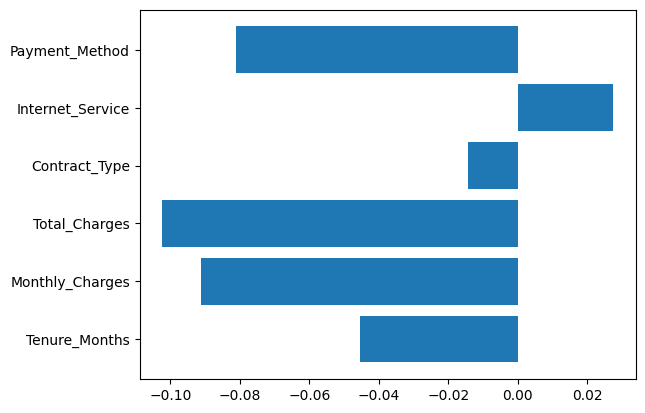

In [65]:
plt.barh(x.columns,model.coef_[0])

### The Main Reason Behind Customer Churn was the Internet Service.